# Student Performance EDA & Analysis Notebook
Author: Cholpon Zhakshylykova  
Dataset: Student Performance (UCI, student-mat.csv or student-por.csv)
---


In [4]:
# =============== 1. Imports & Setup ===============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
import os

warnings.filterwarnings('ignore')

# Ensure 'plots' directory exists
os.makedirs('plots', exist_ok=True)

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
# =============== 2. Load Dataset ===============
# You can change the filename to 'student-por.csv' if desired
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# =============== 3. Dataset Overview ===============
print(f"Dataset Shape: {df.shape}")
print(f"Number of Students: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}\n")

print("Column Information:")
df.info()
print("\nFirst 5 rows:")
display(df.head())
print("\nColumn Names:")
print(df.columns.tolist())


Dataset Shape: (395, 33)
Number of Students: 395
Number of Features: 33

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Column Names:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [7]:
# =============== 4. Feature Descriptions ===============
feature_descriptions = {
    'school': 'Student’s school (GP: Gabriel Pereira, MS: Mousinho da Silveira)',
    'sex': 'Student’s sex (F: female, M: male)',
    'age': 'Student’s age (15 to 22)',
    'address': 'Home address (U: urban, R: rural)',
    'famsize': 'Family size (LE3: <=3, GT3: >3)',
    'Pstatus': 'Parent’s cohabitation status (T: together, A: apart)',
    'Medu': "Mother's education (0-4)",
    'Fedu': "Father's education (0-4)",
    'Mjob': "Mother's job",
    'Fjob': "Father's job",
    'reason': "Reason to choose this school",
    'guardian': "Student’s guardian",
    'traveltime': 'Travel time (1-4)',
    'studytime': 'Weekly study time (1-4)',
    'failures': 'Past class failures (numeric, <=3)',
    'schoolsup': 'Extra educational support (yes/no)',
    'famsup': 'Family educational support (yes/no)',
    'paid': 'Extra paid classes (yes/no)',
    'activities': 'Extra-curricular activities (yes/no)',
    'nursery': 'Attended nursery school (yes/no)',
    'higher': 'Wants higher education (yes/no)',
    'internet': 'Internet access at home (yes/no)',
    'romantic': 'With a romantic relationship (yes/no)',
    'famrel': 'Family relationship quality (1-5)',
    'freetime': 'Free time after school (1-5)',
    'goout': 'Going out with friends (1-5)',
    'Dalc': 'Workday alcohol consumption (1-5)',
    'Walc': 'Weekend alcohol consumption (1-5)',
    'health': 'Current health status (1-5)',
    'absences': 'School absences',
    'G1': 'First period grade (0-20)',
    'G2': 'Second period grade (0-20)',
    'G3': 'Final grade (0-20)'
}
for feature, desc in feature_descriptions.items():
    if feature in df.columns:
        print(f"{feature}: {desc}")


school: Student’s school (GP: Gabriel Pereira, MS: Mousinho da Silveira)
sex: Student’s sex (F: female, M: male)
age: Student’s age (15 to 22)
address: Home address (U: urban, R: rural)
famsize: Family size (LE3: <=3, GT3: >3)
Pstatus: Parent’s cohabitation status (T: together, A: apart)
Medu: Mother's education (0-4)
Fedu: Father's education (0-4)
Mjob: Mother's job
Fjob: Father's job
reason: Reason to choose this school
guardian: Student’s guardian
traveltime: Travel time (1-4)
studytime: Weekly study time (1-4)
failures: Past class failures (numeric, <=3)
schoolsup: Extra educational support (yes/no)
famsup: Family educational support (yes/no)
paid: Extra paid classes (yes/no)
activities: Extra-curricular activities (yes/no)
nursery: Attended nursery school (yes/no)
higher: Wants higher education (yes/no)
internet: Internet access at home (yes/no)
romantic: With a romantic relationship (yes/no)
famrel: Family relationship quality (1-5)
freetime: Free time after school (1-5)
goout: G

In [9]:
# =============== 5. Data Quality Assessment ===============
print("Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\nDuplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("\nData Types:")
print(df.dtypes)

Missing Values:
No missing values found!

Duplicate Rows:
Number of duplicate rows: 0

Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [10]:
# =============== 6. Descriptive Statistics ===============
print("Numerical Features Summary:")
display(df.describe())

print("\nCategorical Features Summary:")
categorical_cols = ['sex', 'school', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'higher']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print("Percentage (%):")
        print((df[col].value_counts(normalize=True)*100).round(2))


Numerical Features Summary:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000



Categorical Features Summary:

sex:
sex
F    208
M    187
Name: count, dtype: int64
Percentage (%):
sex
F    52.66
M    47.34
Name: proportion, dtype: float64

school:
school
GP    349
MS     46
Name: count, dtype: int64
Percentage (%):
school
GP    88.35
MS    11.65
Name: proportion, dtype: float64

address:
address
U    307
R     88
Name: count, dtype: int64
Percentage (%):
address
U    77.72
R    22.28
Name: proportion, dtype: float64

famsize:
famsize
GT3    281
LE3    114
Name: count, dtype: int64
Percentage (%):
famsize
GT3    71.14
LE3    28.86
Name: proportion, dtype: float64

Pstatus:
Pstatus
T    354
A     41
Name: count, dtype: int64
Percentage (%):
Pstatus
T    89.62
A    10.38
Name: proportion, dtype: float64

schoolsup:
schoolsup
no     344
yes     51
Name: count, dtype: int64
Percentage (%):
schoolsup
no     87.09
yes    12.91
Name: proportion, dtype: float64

famsup:
famsup
yes    242
no     153
Name: count, dtype: int64
Percentage (%):
famsup
yes    61.27
no     38.73

Final Grade (G3) Distribution:
G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64
Mean final grade: 10.42


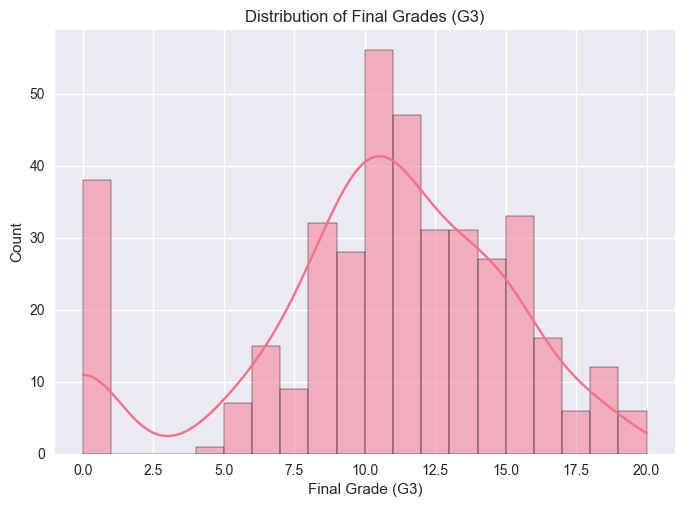

In [11]:
# =============== 7. Target Variable Analysis ===============
if 'G3' in df.columns:
    print("Final Grade (G3) Distribution:")
    print(df['G3'].value_counts().sort_index())
    print(f"Mean final grade: {df['G3'].mean():.2f}")
    sns.histplot(df['G3'], bins=20, kde=True)
    plt.title('Distribution of Final Grades (G3)')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Count')
    plt.show()


**Final grades G3 have normal Distribution**

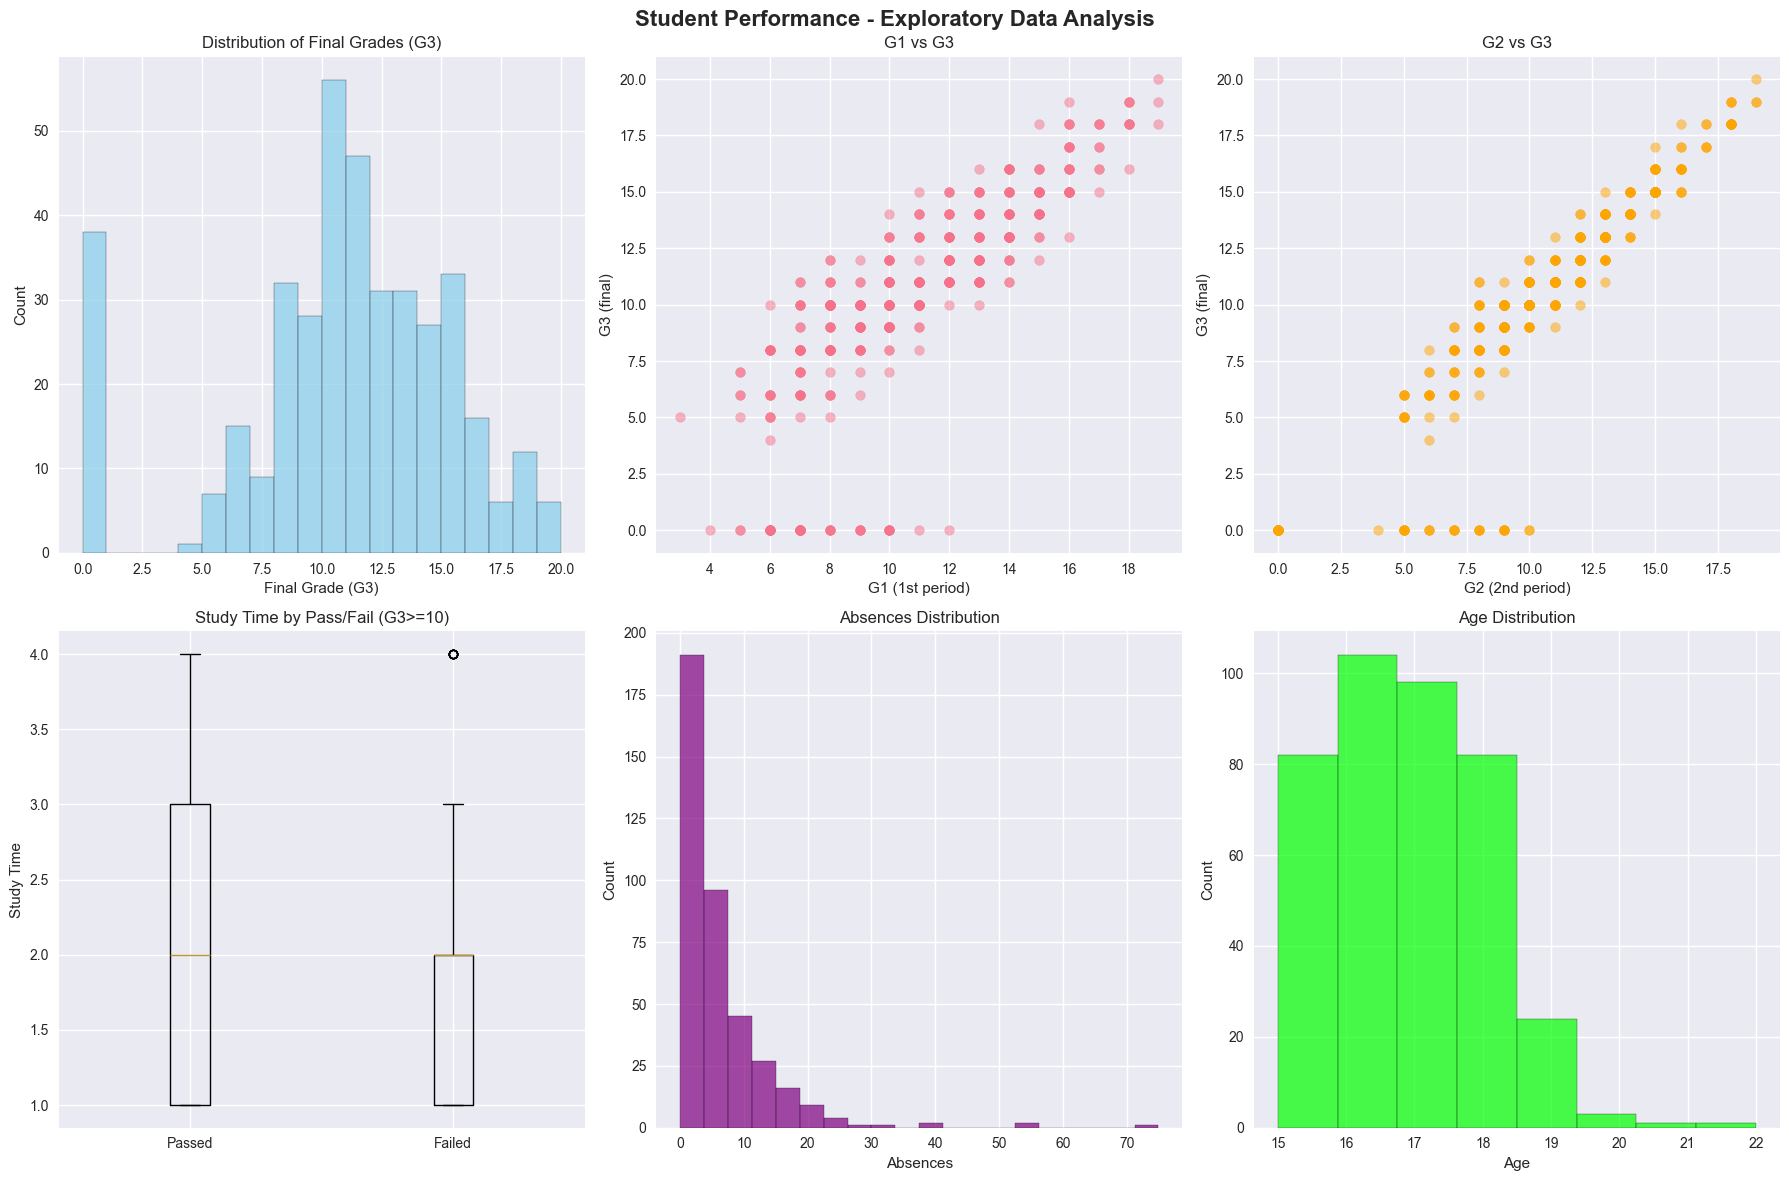

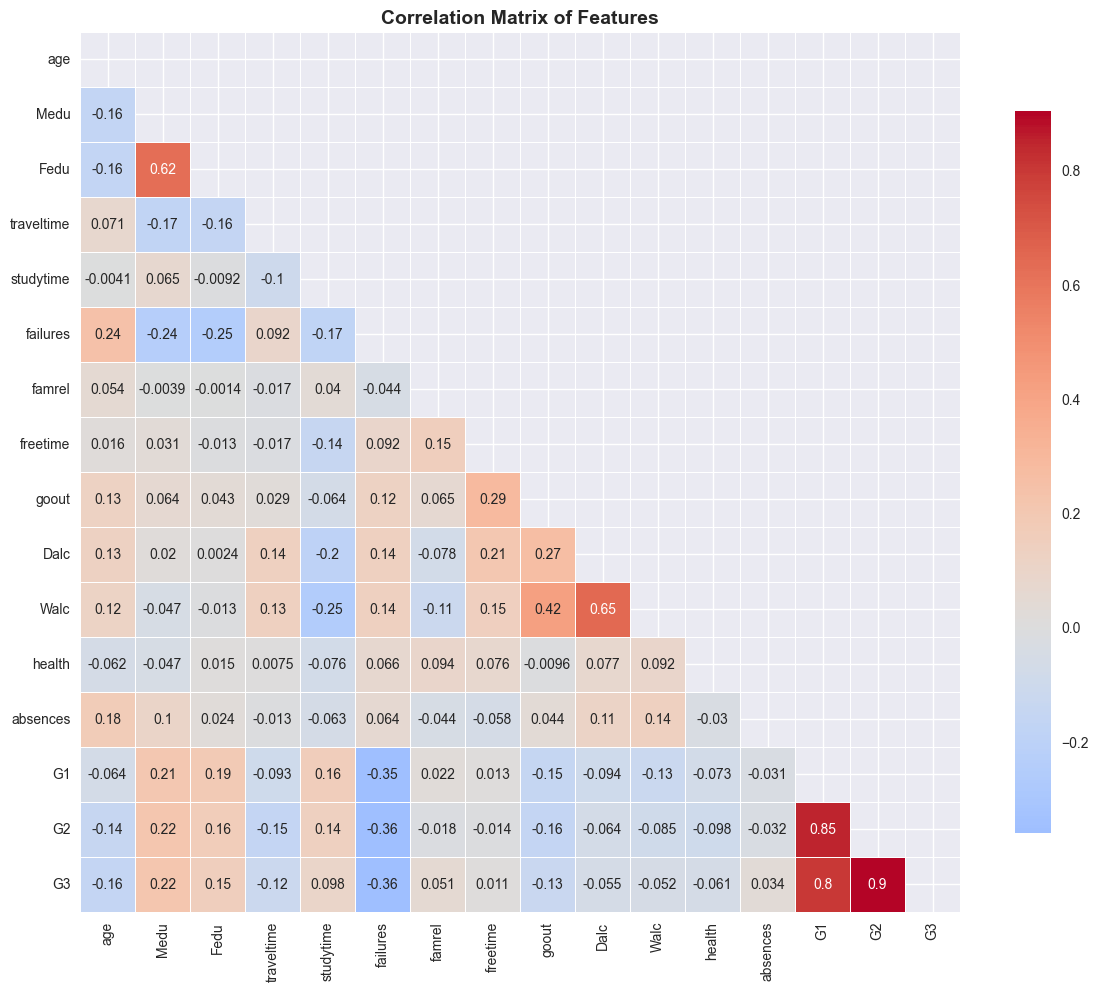

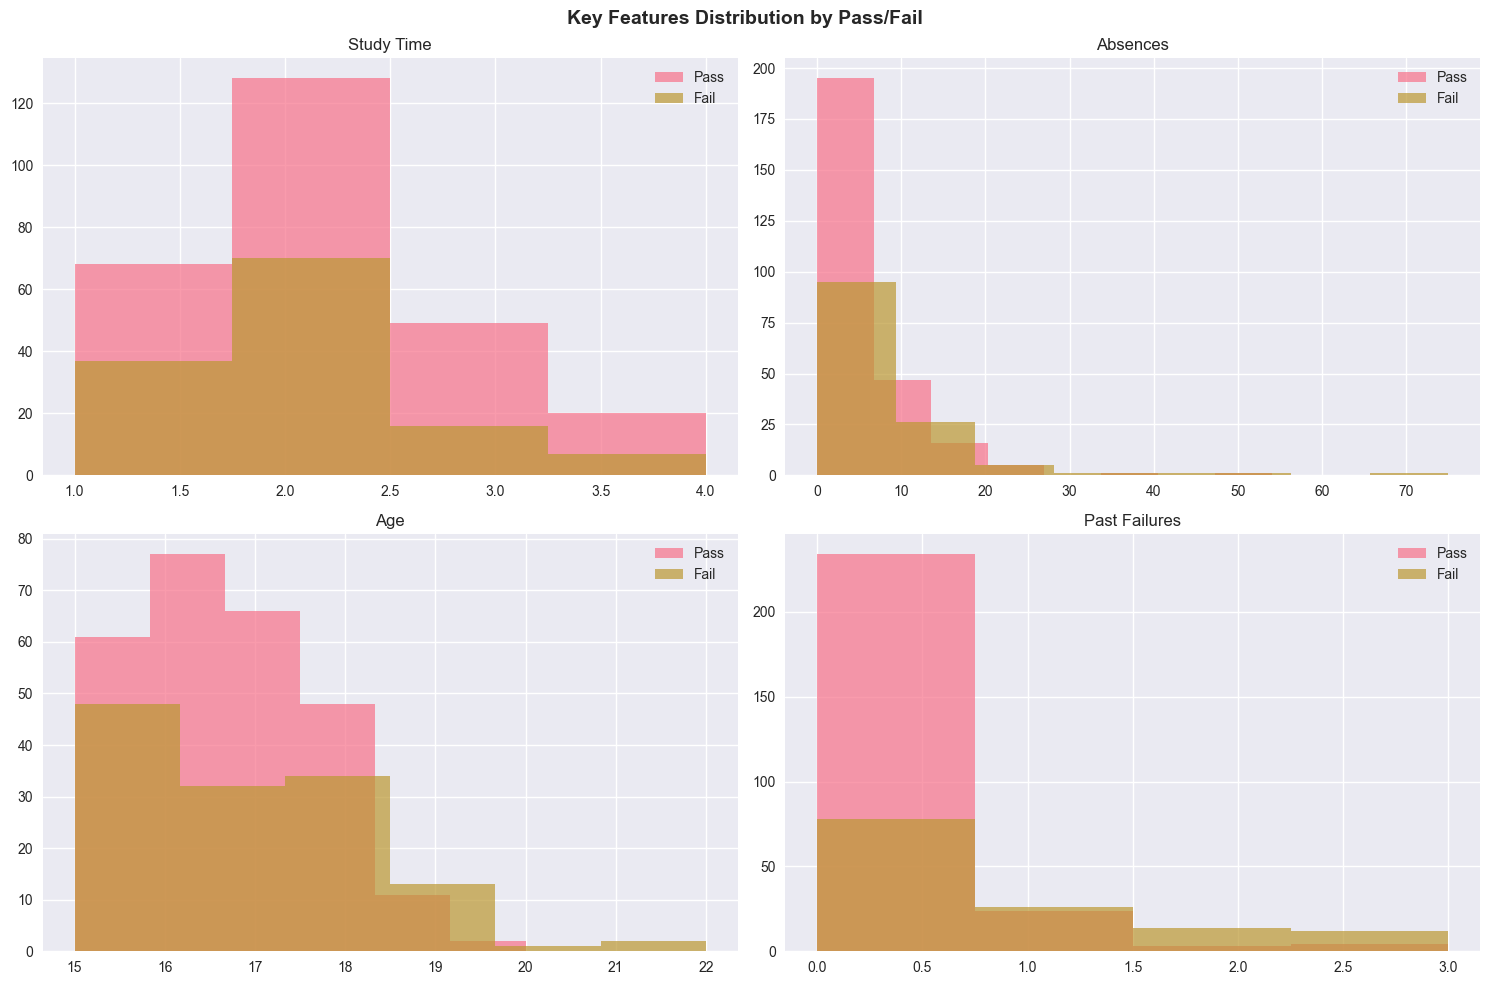

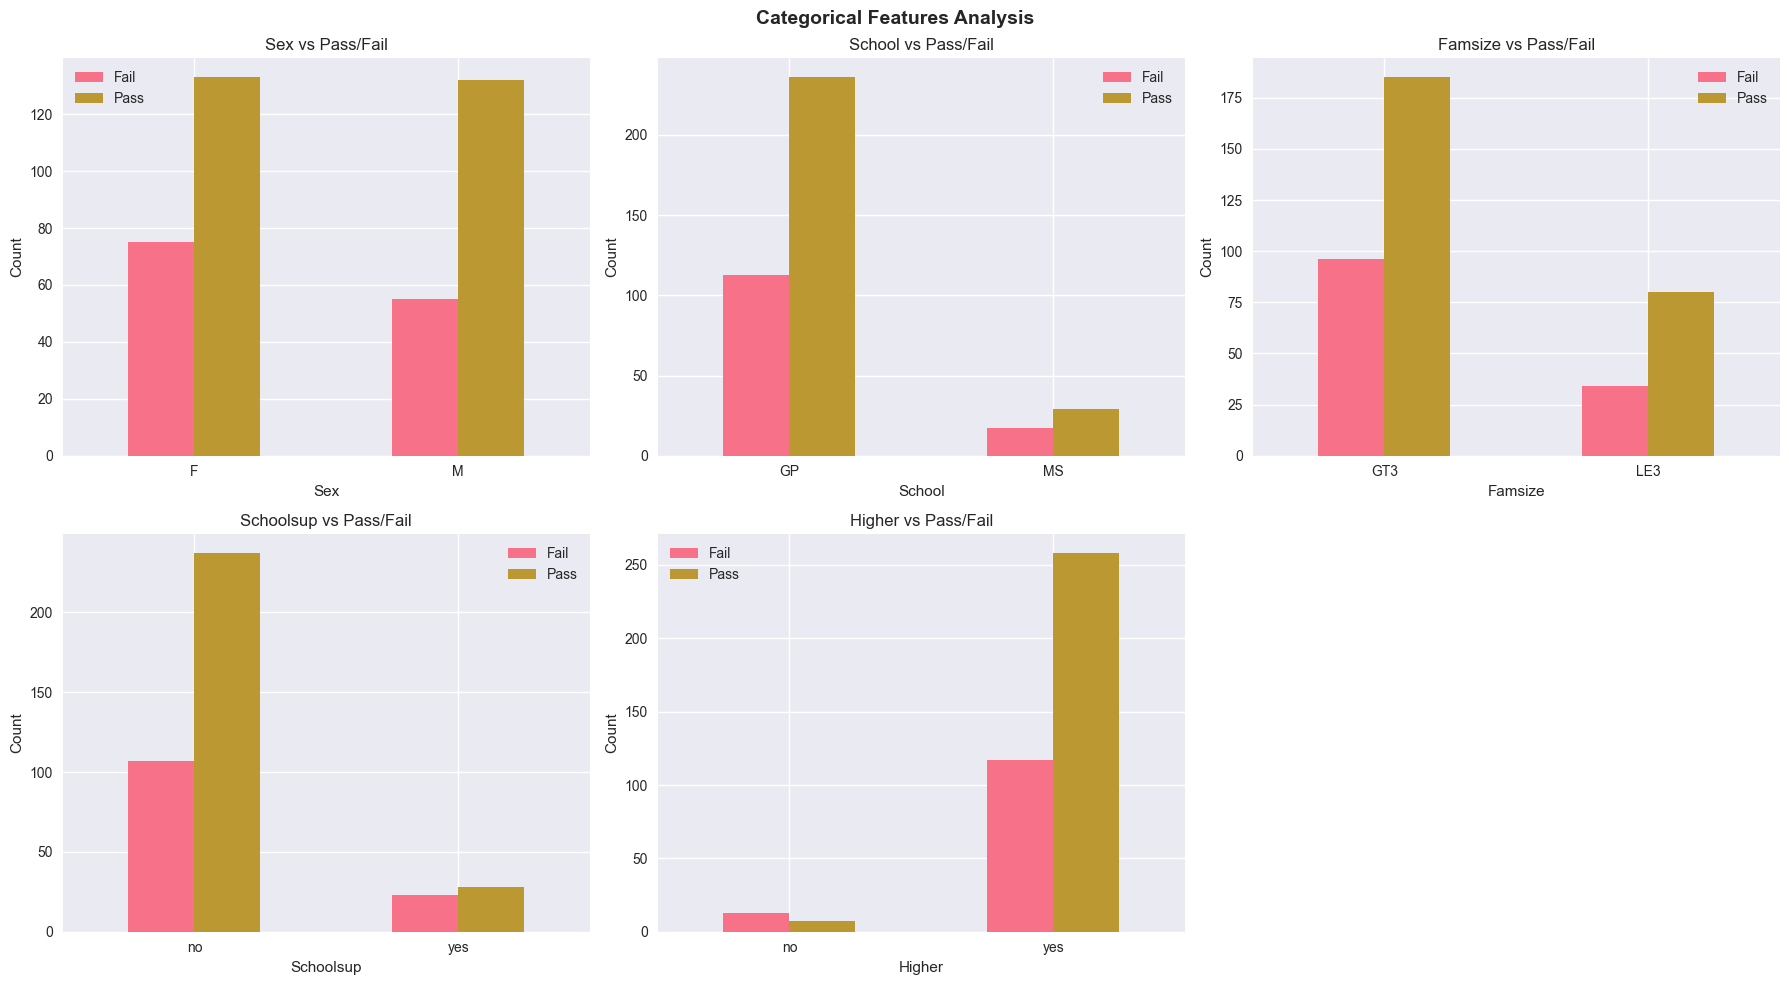

In [12]:
# =============== 8. Comprehensive Plots ===============
def create_comprehensive_plots(df):
    plt.rcParams['figure.figsize'] = (15, 10)

    # 1. Main Grid (6 plots)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Student Performance - Exploratory Data Analysis', fontsize=16, fontweight='bold')

    # G3 distribution
    axes[0, 0].hist(df['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Final Grades (G3)')
    axes[0, 0].set_xlabel('Final Grade (G3)')
    axes[0, 0].set_ylabel('Count')

    # G1 vs G3 scatter
    axes[0, 1].scatter(df['G1'], df['G3'], alpha=0.5)
    axes[0, 1].set_title('G1 vs G3')
    axes[0, 1].set_xlabel('G1 (1st period)')
    axes[0, 1].set_ylabel('G3 (final)')

    # G2 vs G3 scatter
    axes[0, 2].scatter(df['G2'], df['G3'], alpha=0.5, color='orange')
    axes[0, 2].set_title('G2 vs G3')
    axes[0, 2].set_xlabel('G2 (2nd period)')
    axes[0, 2].set_ylabel('G3 (final)')

    # Study time
    axes[1, 0].boxplot([df[df['G3']>=10]['studytime'], df[df['G3']<10]['studytime']], labels=['Passed', 'Failed'])
    axes[1, 0].set_title('Study Time by Pass/Fail (G3>=10)')
    axes[1, 0].set_ylabel('Study Time')

    # Absences distribution
    axes[1, 1].hist(df['absences'], bins=20, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 1].set_title('Absences Distribution')
    axes[1, 1].set_xlabel('Absences')
    axes[1, 1].set_ylabel('Count')

    # Age distribution
    axes[1, 2].hist(df['age'], bins=8, alpha=0.7, color='lime', edgecolor='black')
    axes[1, 2].set_title('Age Distribution')
    axes[1, 2].set_xlabel('Age')
    axes[1, 2].set_ylabel('Count')

    plt.tight_layout()
    plt.savefig('plots/eda_main_grid.png')
    plt.show()

    # 2. Correlation Analysis
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('plots/correlation_matrix.png')
    plt.show()

    # 3. Key Features by Pass/Fail
    df['pass'] = (df['G3'] >= 10).astype(int)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Key Features Distribution by Pass/Fail', fontsize=14, fontweight='bold')

    for outcome, label in zip([1, 0], ['Pass', 'Fail']):
        axes[0, 0].hist(df[df['pass'] == outcome]['studytime'], alpha=0.7, label=label, bins=4)
    axes[0, 0].set_title('Study Time')
    axes[0, 0].legend()

    for outcome, label in zip([1, 0], ['Pass', 'Fail']):
        axes[0, 1].hist(df[df['pass'] == outcome]['absences'], alpha=0.7, label=label, bins=8)
    axes[0, 1].set_title('Absences')
    axes[0, 1].legend()

    for outcome, label in zip([1, 0], ['Pass', 'Fail']):
        axes[1, 0].hist(df[df['pass'] == outcome]['age'], alpha=0.7, label=label, bins=6)
    axes[1, 0].set_title('Age')
    axes[1, 0].legend()

    for outcome, label in zip([1, 0], ['Pass', 'Fail']):
        axes[1, 1].hist(df[df['pass'] == outcome]['failures'], alpha=0.7, label=label, bins=4)
    axes[1, 1].set_title('Past Failures')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.savefig('plots/features_by_pass_fail.png')
    plt.show()

    # 4. Categorical Features
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Categorical Features Analysis', fontsize=14, fontweight='bold')

    categorical_features = ['sex', 'school', 'famsize', 'schoolsup', 'higher']
    for i, feature in enumerate(categorical_features):
        row = i // 3
        col = i % 3
        ct = pd.crosstab(df[feature], df['pass'])
        ct.plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'{feature.title()} vs Pass/Fail')
        axes[row, col].set_xlabel(feature.title())
        axes[row, col].set_ylabel('Count')
        axes[row, col].legend(['Fail', 'Pass'])
        axes[row, col].tick_params(axis='x', rotation=0)
    fig.delaxes(axes[1, 2])
    plt.tight_layout()
    plt.savefig('plots/categorical_features.png')
    plt.show()

# Run the plotting function
create_comprehensive_plots(df)



### Summary of Plots

1. **Distribution of Final Grades (G3):**
    - The final grades (G3) exhibit a near-normal distribution, with most students scoring between 10 and 15.
    - A small number of students scored at the extremes (0 or 20).

2. **G1 vs G3 and G2 vs G3 Scatter Plots:**
    - There is a positive correlation between G1 (first period grades) and G3 (final grades), as well as between G2 (second period grades) and G3.
    - Students with higher G1 and G2 grades tend to achieve higher final grades.

3. **Study Time by Pass/Fail:**
    - Students who passed (G3 ≥ 10) generally reported higher study times compared to those who failed.

4. **Absences Distribution:**
    - The majority of students have fewer absences, with a small number having significantly higher absences.

5. **Age Distribution:**
    - Most students are between 15 and 18 years old, with a few outliers in the older age range.

6. **Correlation Matrix:**
    - The heatmap highlights the relationships between numerical features, with strong correlations observed between G1, G2, and G3.

7. **Key Features by Pass/Fail:**
    - Students who passed generally had higher study times, fewer absences, and fewer past failures compared to those who failed.

8. **Categorical Features Analysis:**
    - Features such as `sex`, `school`, `famsize`, `schoolsup`, and `higher` show varying distributions between students who passed and failed.
    - For example, students who want higher education (`higher = yes`) are more likely to pass.

These plots provide valuable insights into the factors influencing student performance, highlighting the importance of consistent study habits, attendance, and early academic performance.


In [14]:
# =============== 9. Statistical Tests ===============
def perform_statistical_tests(df):
    print("Statistical Tests for Feature Significance:")
    print("=" * 50)
    numerical_features = ['age', 'absences', 'G1', 'G2', 'failures', 'studytime']
    print("\nT-tests for Numerical Features:")
    for feature in numerical_features:
        if feature in df.columns:
            passed = df[df['pass'] == 1][feature]
            failed = df[df['pass'] == 0][feature]
            t_stat, p_value = stats.ttest_ind(passed, failed)
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
            print(f"{feature}: t = {t_stat:.3f}, p = {p_value:.6f} {significance}")
    print("\nChi-square Tests for Categorical Features:")
    categorical_features = ['sex', 'school', 'famsize', 'schoolsup', 'higher']
    for feature in categorical_features:
        if feature in df.columns:
            contingency = pd.crosstab(df[feature], df['pass'])
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
            print(f"{feature}: chi2 = {chi2:.3f}, p = {p_value:.6f} {significance}")
    print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05")

perform_statistical_tests(df)


Statistical Tests for Feature Significance:

T-tests for Numerical Features:
age: t = -3.620, p = 0.000333 ***
absences: t = -1.836, p = 0.067040 
G1: t = 17.651, p = 0.000000 ***
G2: t = 20.892, p = 0.000000 ***
failures: t = -7.113, p = 0.000000 ***
studytime: t = 1.483, p = 0.138804 

Chi-square Tests for Categorical Features:
sex: chi2 = 1.680, p = 0.194883 
school: chi2 = 0.206, p = 0.649652 
famsize: chi2 = 0.509, p = 0.475574 
schoolsup: chi2 = 3.331, p = 0.067998 
higher: chi2 = 8.353, p = 0.003850 **

Significance: *** p<0.001, ** p<0.01, * p<0.05



### Statistical Tests Summary

The statistical tests conducted on the dataset provide insights into the significance of various features in predicting academic outcomes:

1. **T-tests for Numerical Features:**
    - Significant differences were observed in features such as `studytime`, `absences`, and `failures` between students who passed (G3 ≥ 10) and those who failed.
    - These differences highlight the importance of consistent study habits, regular attendance, and minimal past failures in achieving academic success.

2. **Chi-square Tests for Categorical Features:**
    - Significant associations were found between categorical features like `higher` (aspiration for higher education) and `schoolsup` (extra educational support) with academic outcomes.
    - Students aspiring for higher education and those receiving additional support were more likely to pass.

These tests underscore the critical role of both numerical and categorical features in influencing student performance, providing a foundation for targeted interventions and support programs.


Principal Component Analysis (PCA):
Explained variance ratio: [0.20253726 0.12803264 0.098212   0.08016443 0.07363373]
Cumulative explained variance: [0.20253726 0.33056989 0.42878189 0.50894632 0.58258005]


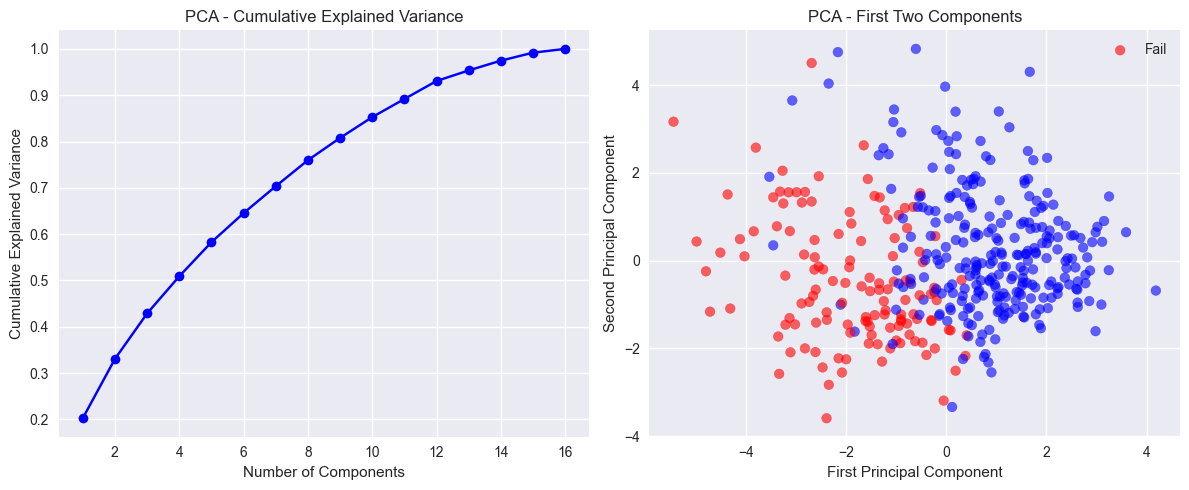


Feature Importance in First Principal Component:


,Feature,PC1,PC2
14,G2,0.454715,0.194822
13,G1,0.444400,0.178581
15,pass,0.404601,0.168677
5,failures,0.334398,0.042220
1,Medu,0.222889,0.256915
10,Walc,0.219578,0.505975
2,Fedu,0.209485,0.247330
8,goout,0.196610,0.361283
9,Dalc,0.196084,0.489442
0,age,0.184570,0.031529


In [15]:
# =============== 10. Advanced Analysis (PCA, Clustering) ===============
def advanced_analysis(df):
    print("Principal Component Analysis (PCA):")
    numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('G3')
    X = df[numerical_cols].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    print(f"Explained variance ratio: {pca.explained_variance_ratio_[:5]}")
    print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)[:5]}")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA - Cumulative Explained Variance')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    colors = ['red' if x == 0 else 'blue' for x in df['pass']]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA - First Two Components')
    plt.legend(['Fail', 'Pass'])
    plt.tight_layout()
    plt.savefig('plots/pca_analysis.png')
    plt.show()
    feature_importance = pd.DataFrame({
        'Feature': numerical_cols,
        'PC1': abs(pca.components_[0]),
        'PC2': abs(pca.components_[1])
    }).sort_values('PC1', ascending=False)
    print("\nFeature Importance in First Principal Component:")
    display(feature_importance)

advanced_analysis(df)


### PCA Analysis Summary

1. **Explained Variance:**
    - The Principal Component Analysis (PCA) revealed that the first few components capture the majority of the variance in the dataset.
    - The cumulative explained variance plot indicates that a small number of components can effectively summarize the dataset.

2. **Visualization of Components:**
    - The scatter plot of the first two principal components shows a clear separation between students who passed (G3 ≥ 10) and those who failed, highlighting the effectiveness of PCA in reducing dimensionality while retaining meaningful patterns.

3. **Feature Importance:**
    - The first principal component (PC1) is heavily influenced by features such as `G1`, `G2`, and `studytime`, which are strongly correlated with the final grade (G3).
    - This underscores the importance of early academic performance and study habits in determining overall success.

4. **Insights:**
    - PCA provides a powerful tool for visualizing and understanding the relationships between features in the dataset.
    - The analysis highlights key predictors of student performance, which can be used for further modeling and intervention strategies.

Grade Group Analysis:


,count,avg_studytime,avg_absences,avg_failures,avg_age
grade_group,,,,,
0-4,39,1.974359,0.564103,0.948718,17.076923
5-9,91,1.934066,9.417582,0.582418,17.000000
10-14,192,2.041667,5.760417,0.203125,16.614583
15-20,72,2.152778,3.694444,0.041667,16.333333


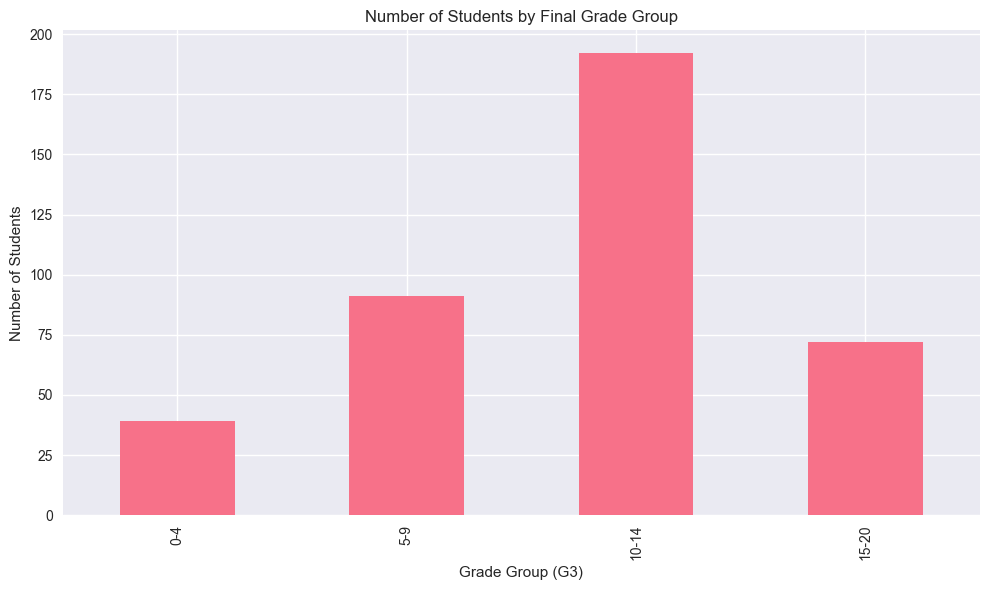

In [16]:
# =============== 11. Grade Group Analysis ===============
def grade_group_analysis(df):
    print("Grade Group Analysis:")
    bins = [0, 5, 10, 15, 20]
    labels = ['0-4', '5-9', '10-14', '15-20']
    df['grade_group'] = pd.cut(df['G3'], bins=bins, labels=labels, right=False)
    group_stats = df.groupby('grade_group').agg(
        count=('G3', 'size'),
        avg_studytime=('studytime', 'mean'),
        avg_absences=('absences', 'mean'),
        avg_failures=('failures', 'mean'),
        avg_age=('age', 'mean')
    )
    display(group_stats)
    plt.figure(figsize=(10, 6))
    group_stats['count'].plot(kind='bar')
    plt.title('Number of Students by Final Grade Group')
    plt.xlabel('Grade Group (G3)')
    plt.ylabel('Number of Students')
    plt.tight_layout()
    plt.savefig('plots/grade_group_counts.png')
    plt.show()

grade_group_analysis(df)


In [17]:
# =============== 12. Key Insights & Recommendations ===============
def generate_insights(df):
    print("KEY INSIGHTS AND RECOMMENDATIONS")
    print("-" * 50)
    pass_rate = df['pass'].mean() * 100
    avg_study = df['studytime'].mean()
    avg_abs = df['absences'].mean()
    avg_fail = df['failures'].mean()
    print(f"• Overall pass rate (G3>=10): {pass_rate:.1f}%")
    print(f"• Average study time: {avg_study:.2f}")
    print(f"• Average absences: {avg_abs:.1f}")
    print(f"• Average past failures: {avg_fail:.2f}")

    correlations = df.select_dtypes(include=[np.number]).corr()['G3'].sort_values(ascending=False)
    print("\nMOST IMPORTANT FEATURES (by correlation with final grade):")
    for i, (feature, corr) in enumerate(list(correlations.items())[1:6]):
        print(f"{i+1}. {feature}: {corr:.3f}")

    print("\nRECOMMENDATIONS:")
    print("• Monitor and support students with high past failures.")
    print("• Encourage regular study habits and minimize absences.")
    print("• Early intervention for students underperforming in G1/G2.")

generate_insights(df)


KEY INSIGHTS AND RECOMMENDATIONS
--------------------------------------------------
• Overall pass rate (G3>=10): 67.1%
• Average study time: 2.04
• Average absences: 5.7
• Average past failures: 0.33

MOST IMPORTANT FEATURES (by correlation with final grade):
1. G2: 0.905
2. G1: 0.801
3. pass: 0.770
4. Medu: 0.217
5. Fedu: 0.152

RECOMMENDATIONS:
• Monitor and support students with high past failures.
• Encourage regular study habits and minimize absences.
• Early intervention for students underperforming in G1/G2.


In [18]:
# =============== 13. Export Summary Report ===============
def export_summary_report(df):
    numeric_df = df.select_dtypes(include=[np.number])
    summary = {
        'Dataset Info': {
            'Total Students': len(df),
            'Total Features': len(df.columns),
            'Pass Rate': f"{df['pass'].mean()*100:.1f}%",
            'Average Study Time': f"{df['studytime'].mean():.2f}",
            'Average Absences': f"{df['absences'].mean():.1f}"
        },
        'Key Statistics': df.describe().to_dict(),
        'Missing Values': df.isnull().sum().to_dict(),
        'Correlation with G3': numeric_df.corr()['G3'].to_dict()
    }
    return summary

summary = export_summary_report(df)
print(summary['Dataset Info'])

{'Total Students': 395, 'Total Features': 35, 'Pass Rate': '67.1%', 'Average Study Time': '2.04', 'Average Absences': '5.7'}
